Chapter 24
# Pandas时间序列数据
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

## 导入包

In [1]:
# # 安装pandas_datareader
# ! pip install pandas_datareader
# # 安装joypy
# ! pip install joypy
# ! pip install -U kaleido

In [2]:
# 导入包
import pandas_datareader as pdr
# 需要安装 pip install pandas_datareader
import joypy 
import pandas as pd
import datetime
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

## 下载数据
从FRED下载标普500 (S&P 500)

In [3]:
# 从FRED下载标普500 (S&P 500)
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

ticker_list = ['SP500']
df = pdr.DataReader(ticker_list, 'fred', start_date, end_date)
# 双备份数据
df.to_csv('SP500_' + str(start_date.date()) + '_' + str(end_date.date()) + '.csv')
df.to_pickle('SP500_' + str(start_date.date()) + '_' + str(end_date.date()) + '.pkl')
# 从备份数据导入
# df = pd.read_csv('SP500_2014-01-01_2022-12-31.csv',  index_col=0, parse_dates=True)
# df = pd.read_pickle('SP500_2014-01-01_2022-12-31.pkl')

In [4]:
df.head()

SP500
DATE               
2014-12-12  2002.33
2014-12-15  1989.63
2014-12-16  1972.74
2014-12-17  2012.89
2014-12-18  2061.23

In [5]:
df.tail()

SP500
DATE               
2022-12-26      NaN
2022-12-27  3829.25
2022-12-28  3783.22
2022-12-29  3849.28
2022-12-30  3839.50

In [6]:
len(df)

2101

## 时间序列趋势

In [7]:
# 含有缺失值的时间序列线图
fig = px.line(df)
fig.update_layout(xaxis_title = 'Date', yaxis_title = 'S&P 500 index', legend_title = 'Curve', showlegend=False)
fig.show()

### 缺失值

In [8]:
# 计算缺失值比例
percentag_missing = df.isnull().sum()*100/len(df)
print('Percentage of missing data')
print("%.3f%%" % percentag_missing)

Percentage of missing data
3.522%


C:\Users\capen\AppData\Local\Temp\ipykernel_23968\407006231.py:4: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



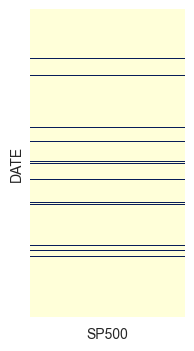

In [9]:
# 可视化缺失值
fig, ax = plt.subplots(figsize = (2,4))
sns.heatmap(df.isnull(), cbar = False, cmap = 'YlGnBu', yticklabels = [])
plt.show()

In [10]:
# 删除NaN
df_ = df.dropna()
percentag_missing = df_.isnull().sum()*100/len(df)
# 再次确认缺失值比例
print('Percentage of missing data')
print("%.3f%%" % percentag_missing)


Percentage of missing data
0.000%


C:\Users\capen\AppData\Local\Temp\ipykernel_23968\135859419.py:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [12]:
# 删除缺失值的时间序列线图
fig = px.line(df_, y='SP500', title='S&P 500 index')
fig.show()

In [15]:
# 按年度分图展示时间序列趋势
df_['Year'] = pd.DatetimeIndex(df_.index).year
fig = px.line(df_, y='SP500', title='S&P 500 index', facet_col='Year', facet_row=None)
fig.update_layout(width=800,height=600,margin=dict(l=20, r=20, t=30, b=20),paper_bgcolor='grey')
fig.update_xaxes(matches=None)
fig.show()

### 趋势

In [18]:
# 计算三种移动平均
df_['MA20'] = df_['SP500'].rolling(20).mean()
df_['MA10'] = df_['SP500'].rolling(10).mean()
df_['MA5'] = df_['SP500'].rolling(5).mean()

fig = px.line(df_[['SP500','MA20','MA10','MA5']].loc['20210101':'20221231'])
fig.update_layout(title='S&P 500 index and moving average', xaxis_title='Date', yaxis_title='S&P500', legend_title = 'Curve')
fig.show()

In [21]:
# 分年度显示移动平均
fig = px.line(df_, y=['SP500','MA20'], title='S&P 500 index', facet_col='Year', facet_row=None)
fig.update_layout(width=700, height=500, margin=dict(l=20, r=20, t=30, b=20), paper_bgcolor="grey")
fig.update_xaxes(matches=None)
fig.show()

## 收益率

### 趋势

In [22]:
df_['daily_r'] = df_['SP500'].pct_change() * 100 
# 计算日收益率
# 小数转为百分数
fig = px.line(df_, y='daily_r')
fig.update_layout(title='Daily relative return', xaxis_title='Date', yaxis_title='Daily return (%)', legend_title = 'Curve')
fig.show()

In [24]:
# 日收益率，按年子图
fig = px.line(df_,y=['daily_r'], title='S&P 500 index', facet_col='Year', facet_row=None)
fig.update_layout(width=700, height=500, margin=dict(l=20, r=20, t=30, b=20), paper_bgcolor="black")
fig.update_xaxes(matches=None)

In [25]:
# 可视化特定时间序列切片
fig = px.line(df_['20200101':'20201231'], y='daily_r')
fig.update_layout(title='Daily relative return', xaxis_title='Date', yaxis_title='Daily return (%)', legend_title='Curve')
fig.show()

### 收益率分布

<Axes: >

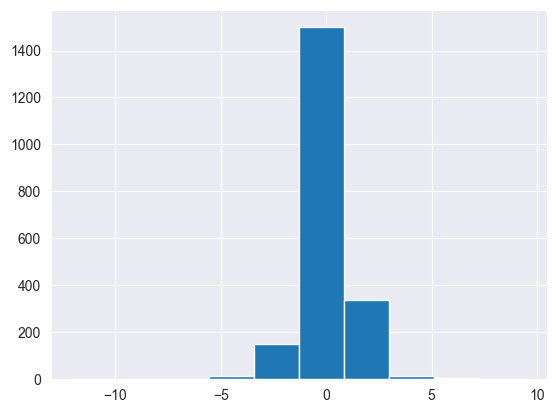

In [27]:
df_['daily_r'].hist()

In [31]:
# 计算均值和标准差
mean = np.mean(df_['daily_r'])
std = np.std(df_['daily_r'])
# 绘制直方图
fig = px.histogram(df_['daily_r'], nbins=50, histnorm='probability density')
# 标注均值和均值加减标准差的位置
fig.add_shape(type='line', x0=mean, y0=0, x1=mean, y1=1, line=dict(color='red', dash='dash'), name='mean')
fig.add_shape(type='line', x0=mean+std, y0=0, x1=mean+std, y1=1, line=dict(color='red', dash='dash'), name='mean+std')
fig.add_shape(type='line', x0=mean-std, y0=0, x1=mean-std, y1=1, line=dict(color='red', dash='dash'), name='mean-std')

# 设置图形布局
fig.update_layout(showlegend=False, xaxis_title='Daily return (%)', yaxis_title='Probability density')

# 显示图形
fig.show()

In [32]:
df_.columns

Index(['SP500', 'Year', 'MA20', 'MA10', 'MA5', 'daily_r'], dtype='object')

In [38]:
# 每年收益率直方图
fig = px.histogram(df_[['daily_r','Year']], nbins=80, histnorm='probability density', title = 'S&P 500 index', orientation='h', facet_col='Year', facet_row=None)
fig.update_layout(width=1350, height=500, margin=dict(l=20, r=20, t=30, b=20), paper_bgcolor="black")
fig.update_xaxes(matches='x')
fig.show()

### 每一年均值、标准差 (波动率)

In [39]:
df_['Year'] = pd.DatetimeIndex(df_.index).year
df_

SP500  Year       MA20      MA10       MA5   daily_r
DATE                                                              
2014-12-12  2002.33  2014        NaN       NaN       NaN       NaN
2014-12-15  1989.63  2014        NaN       NaN       NaN -0.634261
2014-12-16  1972.74  2014        NaN       NaN       NaN -0.848902
2014-12-17  2012.89  2014        NaN       NaN       NaN  2.035240
2014-12-18  2061.23  2014        NaN       NaN  2007.764  2.401522
...             ...   ...        ...       ...       ...       ...
2022-12-23  3844.82  2022  3943.0215  3893.857  3836.986  0.586806
2022-12-27  3829.25  2022  3936.2870  3877.726  3839.304 -0.404960
2022-12-28  3783.22  2022  3927.5665  3854.083  3831.624 -1.202063
2022-12-29  3849.28  2022  3916.0250  3839.479  3825.792  1.746132
2022-12-30  3839.50  2022  3904.1715  3833.854  3829.214 -0.254073

[2027 rows x 6 columns]

F:\PycharmProjects\yingweihua_series\.venv\Lib\site-packages\joypy\joyplot.py:435: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



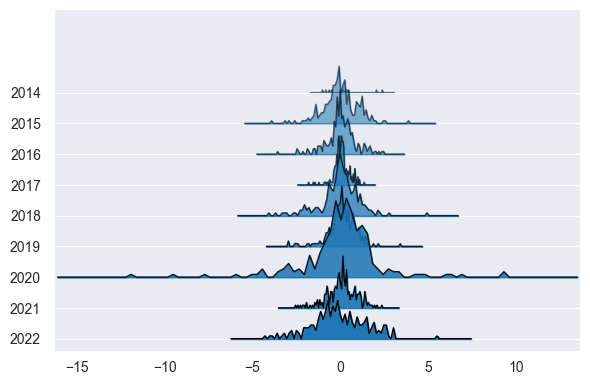

In [41]:
df_['Year'] = pd.DatetimeIndex(df_.index).year
# 绘制山脊图
from matplotlib import cm
fig, ax = plt.subplots(figsize = (6,4))
joypy.joyplot(df_, by="Year", ax = ax, column="daily_r", range_style='own', grid="y", linewidth=1, legend=False, fade=True, kind="counts", bins=100)
plt.show()

F:\PycharmProjects\yingweihua_series\.venv\Lib\site-packages\joypy\joyplot.py:435: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



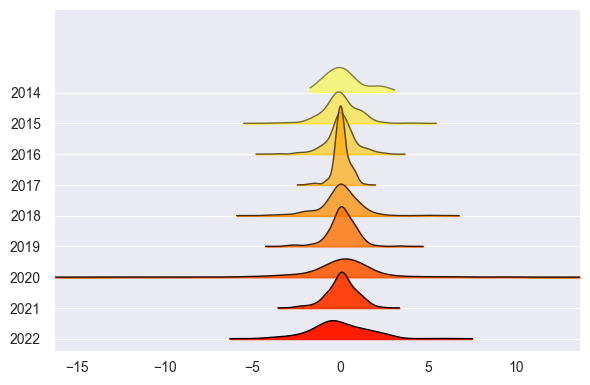

FileNotFoundError: [Errno 2] No such file or directory: 'Figures\\山脊图KDE.svg'

In [49]:
# KDE
fig, ax = plt.subplots(figsize = (6,4))
joypy.joyplot(df_, by="Year", column="daily_r", ax=ax, range_style='own', grid="y", linewidth=1, legend=False, colormap=cm.autumn_r, fade=True)
plt.show()
fig.savefig('Figures\山脊图KDE.svg', format='svg')

In [50]:
Yearly_stats_df = df_.groupby(['Year'], as_index=False).agg({'daily_r':['mean','std']})
Yearly_stats_df

Year   daily_r          
             mean       std
0  2014  0.237462  1.051388
1  2015  0.001856  0.976014
2  2016  0.039542  0.824905
3  2017  0.071616  0.421157
4  2018 -0.019889  1.074153
5  2019  0.103801  0.785165
6  2020  0.083217  2.168971
7  2021  0.097951  0.825132
8  2022 -0.074544  1.522789

In [51]:
Yearly_stats_df.columns

MultiIndex([(   'Year',     ''),
            ('daily_r', 'mean'),
            ('daily_r',  'std')],
           )

In [52]:
Yearly_stats_df['daily_r']['mean']

0    0.237462
1    0.001856
2    0.039542
3    0.071616
4   -0.019889
5    0.103801
6    0.083217
7    0.097951
8   -0.074544
Name: mean, dtype: float64

In [53]:
# 使用plotly.express绘制条形图
fig = px.bar(y=Yearly_stats_df['Year'], x=Yearly_stats_df['daily_r']['mean'], title='Mean', orientation='h')
# 设置图形布局
fig.update_layout(showlegend=False, xaxis_title='Mean of daily return (%)', yaxis_title='Year')
# 显示图形
fig.show()
# pio.write_image(fig, 'Figures/年平均日收益率.svg')

In [54]:
# 使用plotly.express绘制条形图
fig = px.bar(y=Yearly_stats_df['Year'], x=Yearly_stats_df['daily_r']['std'], title='Daily vol', orientation='h')
# 设置图形布局
fig.update_layout(showlegend=False, xaxis_title='Volatility of daily return (%)', yaxis_title='Year')
# 显示图形
fig.show()
# pio.write_image(fig, 'Figures/年波动率.svg')

### 每一季度均值、标准差 (波动率)

In [56]:
# 季度均值、标准差
quarters = df_.index.quarter
years = df_.index.year
# 季度信息
df_['quarter'] = [f"Q{quarter}" for quarter in quarters]
# 将季度和年份信息组合成字符串
quarter_yr = [f"{year}, Q{quarter}" for year, quarter in zip(years, quarters)]
# 添加新列 "Period"
df_['quarter_yr'] = quarter_yr
df_

SP500  Year       MA20      MA10       MA5   daily_r quarter  \
DATE                                                                         
2014-12-12  2002.33  2014        NaN       NaN       NaN       NaN      Q4   
2014-12-15  1989.63  2014        NaN       NaN       NaN -0.634261      Q4   
2014-12-16  1972.74  2014        NaN       NaN       NaN -0.848902      Q4   
2014-12-17  2012.89  2014        NaN       NaN       NaN  2.035240      Q4   
2014-12-18  2061.23  2014        NaN       NaN  2007.764  2.401522      Q4   
...             ...   ...        ...       ...       ...       ...     ...   
2022-12-23  3844.82  2022  3943.0215  3893.857  3836.986  0.586806      Q4   
2022-12-27  3829.25  2022  3936.2870  3877.726  3839.304 -0.404960      Q4   
2022-12-28  3783.22  2022  3927.5665  3854.083  3831.624 -1.202063      Q4   
2022-12-29  3849.28  2022  3916.0250  3839.479  3825.792  1.746132      Q4   
2022-12-30  3839.50  2022  3904.1715  3833.854  3829.214 -0.254073      Q4   

           quarter_yr  
DATE                   
2014-12-12   2014, Q4  
2014-12-15   2014, Q4  
2014-12-16   2014, Q4  
2014-12-17   2014, Q4  
2014-12-18   2014, Q4  
...               ...  
2022-12-23   2022, Q4  
2022-12-27   2022, Q4  
2022-12-28   2022, Q4  
2022-12-29   2022, Q4  
2022-12-30   2022, Q4  

[2027 rows x 8 columns]

In [57]:
type(quarter_yr)

list

F:\PycharmProjects\yingweihua_series\.venv\Lib\site-packages\joypy\joyplot.py:435: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



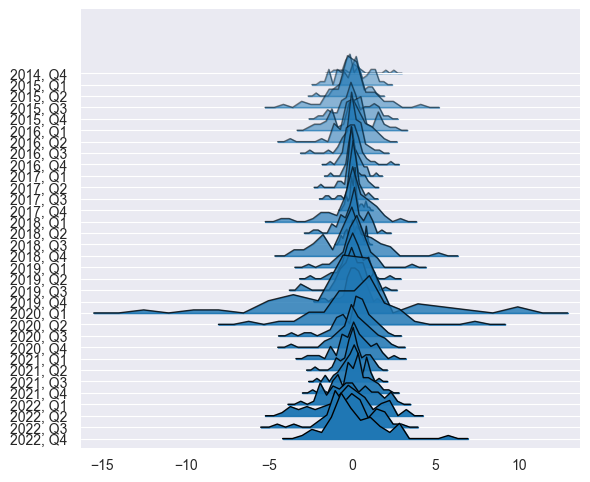

In [59]:
fig, ax = plt.subplots(figsize = (6,5))
joypy.joyplot(df_, by="quarter_yr", ax=ax, column="daily_r", range_style='own', grid="y", linewidth=1, legend=False, fade=True,kind="counts", bins=20)
plt.show()

F:\PycharmProjects\yingweihua_series\.venv\Lib\site-packages\joypy\joyplot.py:435: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



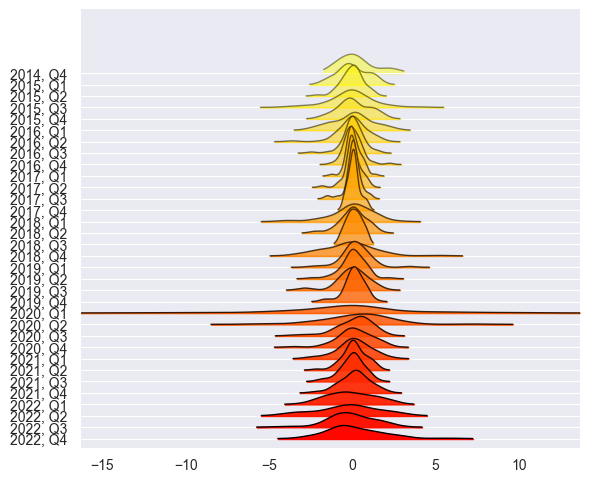

In [61]:
# KDE
fig, ax = plt.subplots(figsize = (6,5))
joypy.joyplot(df_, by="quarter_yr", column="daily_r", ax=ax, range_style='own', grid="y", linewidth=1, legend=False, colormap=cm.autumn_r, fade=True)
plt.show()

In [62]:
Qly_stats_df = df_.groupby(['quarter_yr'], as_index=False).agg({'daily_r':['mean','std']})
Qly_stats_df

quarter_yr   daily_r          
                   mean       std
0    2014, Q4  0.237462  1.051388
1    2015, Q1  0.011043  0.890674
2    2015, Q2 -0.001675  0.636710
3    2015, Q3 -0.103630  1.320864
4    2015, Q4  0.102063  0.935158
5    2016, Q1  0.019328  1.167243
6    2016, Q2  0.033071  0.861039
7    2016, Q3  0.052739  0.618772
8    2016, Q4  0.052281  0.541388
9    2017, Q1  0.087784  0.422136
10   2017, Q2  0.041323  0.463237
11   2017, Q3  0.062643  0.448068
12   2017, Q4  0.094972  0.350295
13   2018, Q1 -0.012441  1.250448
14   2018, Q2  0.048253  0.786124
15   2018, Q3  0.111371  0.453949
16   2018, Q4 -0.227584  1.496342
17   2019, Q1  0.205112  0.855788
18   2019, Q2  0.061612  0.723675
19   2019, Q3  0.022797  0.934450
20   2019, Q4  0.129773  0.592447
21   2020, Q1 -0.295294  3.587505
22   2020, Q2  0.309015  2.007507
23   2020, Q3  0.132788  1.065023
24   2020, Q4  0.178059  1.025733
25   2021, Q1  0.096965  0.999558
26   2021, Q2  0.127174  0.702674
27   2021, Q3  0.006089  0.703651
28   2021, Q4  0.161988  0.875438
29   2022, Q1 -0.072785  1.353220
30   2022, Q2 -0.273605  1.784536
31   2022, Q3 -0.075709  1.347171
32   2022, Q4  0.120809  1.578901

In [63]:
# 使用plotly.express绘制条形图
fig = px.bar(y=Qly_stats_df['quarter_yr'], x=Qly_stats_df['daily_r']['mean'], title='Mean', orientation='h')
# 设置图形布局
fig.update_layout(showlegend=False, width=600, height=800, xaxis_title='Mean of daily return (%)', yaxis_title='Quarter')
# 显示图形
fig.show()

In [65]:
# 使用plotly.express绘制条形图
fig = px.bar(y=Qly_stats_df['quarter_yr'], x=Qly_stats_df['daily_r']['std'], title='Volatility', orientation='h')
# 设置图形布局
fig.update_layout(showlegend=False, width = 600, height = 800, xaxis_title='Vol of daily return (%)', yaxis_title='Quarter')
# 显示图形
fig.show()
# pio.write_image(fig, 'Figures/季度波动率.svg')

### 滚动波动率

In [67]:
df_vol = df_['daily_r'].rolling(250).std()
fig = px.line(df_vol, y='daily_r')
fig.update_layout(title='Rolling vol', xaxis_title='Date', yaxis_title='Volatility')
fig.show()

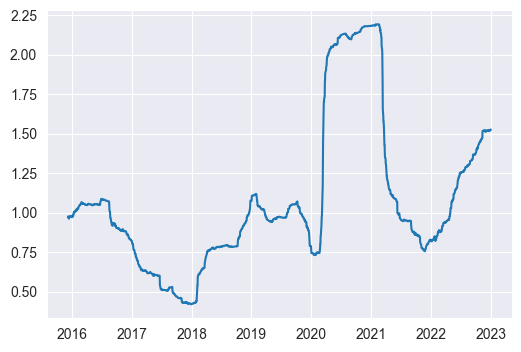

In [69]:
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(df_vol)
plt.show()

## 相关性系数

### 整体相关性系数

In [71]:
# 下载更多数据
ticker_list = ['DEXJPUS','DEXCAUS','DEXCHUS','SP500']
df_FX_SP500 = pdr.DataReader(ticker_list, 'fred', start_date, end_date)
# 备份数据
df_FX_SP500.to_csv('FX_SP500_' + str(start_date.date()) + '_' + str(end_date.date()) + '.csv')
df_FX_SP500.to_pickle('FX_SP500_' + str(start_date.date()) + '_' + str(end_date.date()) + '.pkl')

In [73]:
# 修改column names
df_FX_SP500 = df_FX_SP500.rename(columns={'DEXJPUS': 'JPY to USD', 'DEXCAUS': 'CAD to USD', 'DEXCHUS':'CNY to USD'})
df_FX_SP500_return = df_FX_SP500.dropna().pct_change()
df_FX_SP500_return


JPY to USD  CAD to USD  CNY to USD     SP500
DATE                                                    
2014-12-12         NaN         NaN         NaN       NaN
2014-12-15   -0.003976    0.007887    0.000582 -0.006343
2014-12-16   -0.003992   -0.000430   -0.000162 -0.008489
2014-12-17    0.003070    0.000430    0.001083  0.020352
2014-12-18    0.010201   -0.003010    0.002938  0.024015
...                ...         ...         ...       ...
2022-12-23    0.003325   -0.004834    0.000730  0.005868
2022-12-27    0.004895   -0.006109   -0.004007 -0.004050
2022-12-28    0.006295    0.006220    0.002500 -0.012021
2022-12-29   -0.008267   -0.003091   -0.002135  0.017461
2022-12-30   -0.010138   -0.001034   -0.009379 -0.002541

[2002 rows x 4 columns]

In [77]:
fig = px.imshow(df_FX_SP500_return.corr(), text_auto='.2f', color_continuous_scale='RdYlBu_r')
fig.show()
# pio.write_image(fig, 'Figures/相关性热图.svg')

In [80]:
fig = px.scatter(df_FX_SP500_return, x='SP500', y='CAD to USD', trendline='ols')
fig.show()
# pio.write_image(fig, 'Figures/散点图，回归线.svg')

### 滚动相关性系数

In [81]:
# 计算滚动相关性系数
df_rolling_corr = df_FX_SP500_return.rolling(250).corr().dropna()
df_rolling_corr

JPY to USD  CAD to USD  CNY to USD     SP500
DATE                                                               
2015-12-15 JPY to USD    1.000000    0.265142    0.044210  0.355682
           CAD to USD    0.265142    1.000000    0.045014 -0.185179
           CNY to USD    0.044210    0.045014    1.000000 -0.051164
           SP500         0.355682   -0.185179   -0.051164  1.000000
2015-12-16 JPY to USD    1.000000    0.270660    0.046016  0.354598
...                           ...         ...         ...       ...
2022-12-29 SP500        -0.090183   -0.394909   -0.200354  1.000000
2022-12-30 JPY to USD    1.000000    0.291438    0.311166 -0.089333
           CAD to USD    0.291438    1.000000    0.350177 -0.394697
           CNY to USD    0.311166    0.350177    1.000000 -0.196284
           SP500        -0.089333   -0.394697   -0.196284  1.000000

[7008 rows x 4 columns]

In [82]:
# df_rolling_corr.to_csv('df_rolling_corr.csv')

In [83]:
df_rolling_corr.unstack().columns.values

array([('JPY to USD', 'CAD to USD'), ('JPY to USD', 'CNY to USD'),
       ('JPY to USD', 'JPY to USD'), ('JPY to USD', 'SP500'),
       ('CAD to USD', 'CAD to USD'), ('CAD to USD', 'CNY to USD'),
       ('CAD to USD', 'JPY to USD'), ('CAD to USD', 'SP500'),
       ('CNY to USD', 'CAD to USD'), ('CNY to USD', 'CNY to USD'),
       ('CNY to USD', 'JPY to USD'), ('CNY to USD', 'SP500'),
       ('SP500', 'CAD to USD'), ('SP500', 'CNY to USD'),
       ('SP500', 'JPY to USD'), ('SP500', 'SP500')], dtype=object)

In [84]:
df_rolling_corr_ = df_rolling_corr.unstack()
# df_rolling_corr_.to_csv('wide.csv')

In [86]:
df_rolling_corr_.columns = ['_'.join(col) for col in df_rolling_corr.unstack().columns.values]

In [87]:
# df_rolling_corr.unstack().columns.values

In [88]:
df_rolling_corr_.columns = ['_'.join(col).strip() for col in df_rolling_corr.unstack().columns.values]
# df_rolling_corr_

In [89]:
df_rolling_corr_ = df_rolling_corr_.dropna()
# df_rolling_corr_

In [93]:
from itertools import combinations

list_tickers = list(df_FX_SP500_return.columns)
pairs_kept = ['_'.join(combo) for combo in combinations(list_tickers,2)]
df_rolling_corr_ = df_rolling_corr_[pairs_kept]
df_rolling_corr_

JPY to USD_CAD to USD  JPY to USD_CNY to USD  JPY to USD_SP500  \
DATE                                                                         
2015-12-15               0.265142               0.044210          0.355682   
2015-12-16               0.270660               0.046016          0.354598   
2015-12-17               0.277364               0.049076          0.342134   
2015-12-18               0.285662               0.050222          0.351802   
2015-12-21               0.289880               0.039731          0.338694   
...                           ...                    ...               ...   
2022-12-23               0.289411               0.302548         -0.080969   
2022-12-27               0.286208               0.299009         -0.081676   
2022-12-28               0.288933               0.300350         -0.085278   
2022-12-29               0.291094               0.302276         -0.090183   
2022-12-30               0.291438               0.311166         -0.089333   

            CAD to USD_CNY to USD  CAD to USD_SP500  CNY to USD_SP500  
DATE                                                                   
2015-12-15               0.045014         -0.185179         -0.051164  
2015-12-16               0.047102         -0.176634         -0.044748  
2015-12-17               0.052310         -0.187460         -0.049816  
2015-12-18               0.053744         -0.177372         -0.051901  
2015-12-21               0.057017         -0.168422         -0.068307  
...                           ...               ...               ...  
2022-12-23               0.345684         -0.394367         -0.198021  
2022-12-27               0.349625         -0.391364         -0.196280  
2022-12-28               0.351154         -0.393213         -0.197793  
2022-12-29               0.352539         -0.394909         -0.200354  
2022-12-30               0.350177         -0.394697         -0.196284  

[1752 rows x 6 columns]

In [95]:
fig = px.line(df_rolling_corr_)
fig.update_layout(xaxis_title = 'Date', yaxis_title = 'corr', legend_title = 'Pair')
fig.show()
# pio.write_image(fig, 'Figures/滚动相关性系数.svg')

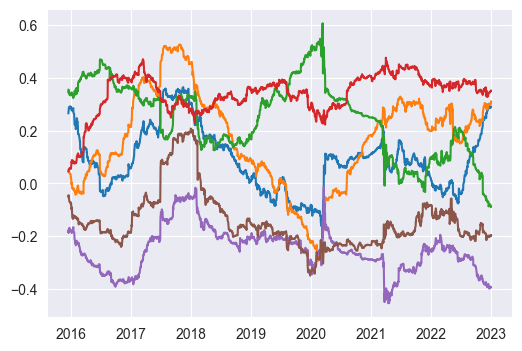

In [96]:
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(df_rolling_corr_)
plt.show()

# fig.savefig('Figures\滚动相关性系数.svg', format='svg')

In [54]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023